**semiconductor_data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib as plt
import seaborn as sns # Import the seaborn library and alias it as 'sns'

df = pd.read_csv('chip_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [ ]:
df.describe()

,Unnamed: 0,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4854.000000,4845.000000,4228.000000,4139.000000,4143.000000,4854.000000,536.000000,1948.000000,1306.000000
mean,2426.500000,55.109598,81.359981,188.440445,1929.922279,1484.406057,8397.459851,2134.756653,363.670511
std,1401.373433,44.998676,76.807808,126.189383,4044.891098,1066.701523,13799.551131,3898.431487,1145.931856
min,0.000000,0.000000,1.000000,1.000000,8.000000,100.000000,10.020000,12.800000,3.600000
25%,1213.250000,22.000000,33.000000,104.000000,154.000000,590.000000,768.800000,257.300000,38.295000
50%,2426.500000,40.000000,65.000000,148.000000,624.000000,1073.500000,2965.500000,696.000000,89.280000
75%,3639.750000,90.000000,100.000000,239.000000,1550.000000,2400.000000,10600.000000,2116.750000,220.000000
max,4853.000000,250.000000,900.000000,826.000000,54200.000000,4700.000000,184600.000000,40000.000000,11540.000000


**1. Explore the missingness in dataset for categorical and numerical data**

In [ ]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Missingness for numerical features
print("Missingness in numerical features:")
print(df[numerical_cols].isnull().sum())

# Missingness for categorical features
print("\nMissingness in categorical features:")
print(df[categorical_cols].isnull().sum())

Missingness in numerical features:
Unnamed: 0                  0
Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
Freq (MHz)                  0
FP16 GFLOPS              4318
FP32 GFLOPS              2906
FP64 GFLOPS              3548
dtype: int64

Missingness in categorical features:
Product         0
Type            0
Release Date    0
Foundry         0
Vendor          0
dtype: int64


**2. Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.**

# Numerical features: Imputing with the mean preserves the overall distribution of the data and avoids introducing bias.

# Categorical features: Imputing with the mode is appropriate as it replaces missing values with the most frequent category. This is less likely to distort the distribution of categorical variables compared to other imputation methods.

#Forward fill (ffill) and backward fill (bfill) are methods used to fill missing values by carrying forward the last observed non-missing value (for ffill) or by carrying backward the next observed non-missing value (for bfill). These methods are particularly useful for time-series data.

#Deletion of rows with missing numerical values could lead to significant data loss, especially if the missingness is not completely random.


In [ ]:
# Impute numerical features with the mean
for col in numerical_cols:
    if col in df.columns and df[col].isnull().any(): # Check if column exists in DataFrame
        df[col] = df[col].fillna(df[col].mean())

# Impute categorical features with the mode
for col in categorical_cols:
    if col in df.columns and df[col].isnull().any(): # Check if column exists in DataFrame
        df[col] = df[col].fillna(df[col].mode()[0])

# Verify that there are no more missing values
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Unnamed: 0               0
Product                  0
Type                     0
Release Date             0
Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
Freq (MHz)               0
Foundry                  0
Vendor                   0
FP16 GFLOPS              0
FP32 GFLOPS              0
FP64 GFLOPS              0
dtype: int64


In [ ]:
df.describe()

,Unnamed: 0,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000
mean,2426.500000,55.109598,81.359981,188.440445,1929.922279,1484.406057,8397.459851,2134.756653,363.670511
std,1401.373433,44.956931,71.683029,116.523337,3736.859205,1066.701523,4581.806092,2469.265202,594.235923
min,0.000000,0.000000,1.000000,1.000000,8.000000,100.000000,10.020000,12.800000,3.600000
25%,1213.250000,22.000000,35.000000,112.000000,180.000000,590.000000,8397.459851,1124.500000,363.670511
50%,2426.500000,40.000000,67.000000,177.000000,950.000000,1073.500000,8397.459851,2134.756653,363.670511
75%,3639.750000,90.000000,95.000000,221.000000,1929.922279,2400.000000,8397.459851,2134.756653,363.670511
max,4853.000000,250.000000,900.000000,826.000000,54200.000000,4700.000000,184600.000000,40000.000000,11540.000000


**Transform temporal data to their corrrect format (date time) Release Date**

# Now handle the NaT values resulting from conversion errors
# You have several options, depending on how you want to deal with bad data:
# 1. Drop rows with invalid dates
# 2. Fill with a specific date (e.g., the earliest valid date)
# 3. Fill with a placeholder value (e.g., a special date)

In [ ]:
# Convert 'Release Date' to datetime, coercing errors to NaT
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Example of filling NaT with a default date:
df['Release Date'] = df['Release Date'].fillna(pd.to_datetime('1900-01-01'))

# Check the data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             4854 non-null   int64         
 1   Product                4854 non-null   object        
 2   Type                   4854 non-null   object        
 3   Release Date           4854 non-null   datetime64[ns]
 4   Process Size (nm)      4854 non-null   float64       
 5   TDP (W)                4854 non-null   float64       
 6   Die Size (mm^2)        4854 non-null   float64       
 7   Transistors (million)  4854 non-null   float64       
 8   Freq (MHz)             4854 non-null   float64       
 9   Foundry                4854 non-null   object        
 10  Vendor                 4854 non-null   object        
 11  FP16 GFLOPS            4854 non-null   float64       
 12  FP32 GFLOPS            4854 non-null   float64       
 13  FP6

In [ ]:
import pandas as pd

df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

df['Release Date'] = df['Release Date'].fillna(pd.to_datetime('1900-01-01'))

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             4854 non-null   int64         
 1   Product                4854 non-null   object        
 2   Type                   4854 non-null   object        
 3   Release Date           4854 non-null   datetime64[ns]
 4   Process Size (nm)      4854 non-null   float64       
 5   TDP (W)                4854 non-null   float64       
 6   Die Size (mm^2)        4854 non-null   float64       
 7   Transistors (million)  4854 non-null   float64       
 8   Freq (MHz)             4854 non-null   float64       
 9   Foundry                4854 non-null   object        
 10  Vendor                 4854 non-null   object        
 11  FP16 GFLOPS            4854 non-null   float64       
 12  FP32 GFLOPS            4854 non-null   float64       
 13  FP6

In [ ]:
# Datetime conversion (handling errors robustly)
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Release Date'] = df['Release Date'].fillna(pd.to_datetime('1900-01-01')) # Fill NaT with placeholder d
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             4854 non-null   int64         
 1   Product                4854 non-null   object        
 2   Type                   4854 non-null   object        
 3   Release Date           4854 non-null   datetime64[ns]
 4   Process Size (nm)      4854 non-null   float64       
 5   TDP (W)                4854 non-null   float64       
 6   Die Size (mm^2)        4854 non-null   float64       
 7   Transistors (million)  4854 non-null   float64       
 8   Freq (MHz)             4854 non-null   float64       
 9   Foundry                4854 non-null   object        
 10  Vendor                 4854 non-null   object        
 11  FP16 GFLOPS            4854 non-null   float64       
 12  FP32 GFLOPS            4854 non-null   float64       
 13  FP6

**Perfom a full EDA and demonstrate the validity of the following assumptions**

In [ ]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all')) # Include all data types for summary


Descriptive Statistics:
         Unnamed: 0              Product  Type                   Release Date  \
count   4854.000000                 4854  4854                           4854   
unique          NaN                 4278     2                            NaN   
top             NaN  AMD Athlon 64 3200+   GPU                            NaN   
freq            NaN                   12  2662                            NaN   
mean    2426.500000                  NaN   NaN  2009-07-06 23:35:40.420271872   
min        0.000000                  NaN   NaN            1900-01-01 00:00:00   
25%     1213.250000                  NaN   NaN            2006-05-23 00:00:00   
50%     2426.500000                  NaN   NaN            2011-02-22 00:00:00   
75%     3639.750000                  NaN   NaN            2015-05-05 00:00:00   
max     4853.000000                  NaN   NaN            2021-04-13 00:00:00   
std     1401.373433                  NaN   NaN                            NaN   

  

Data vizualization

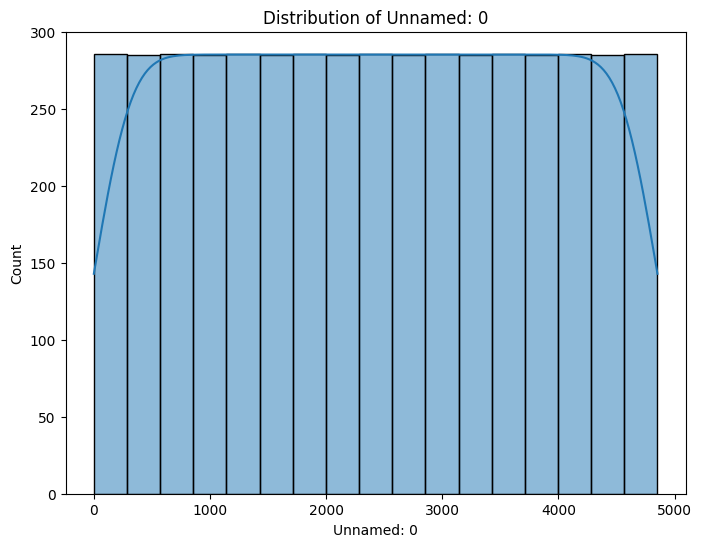

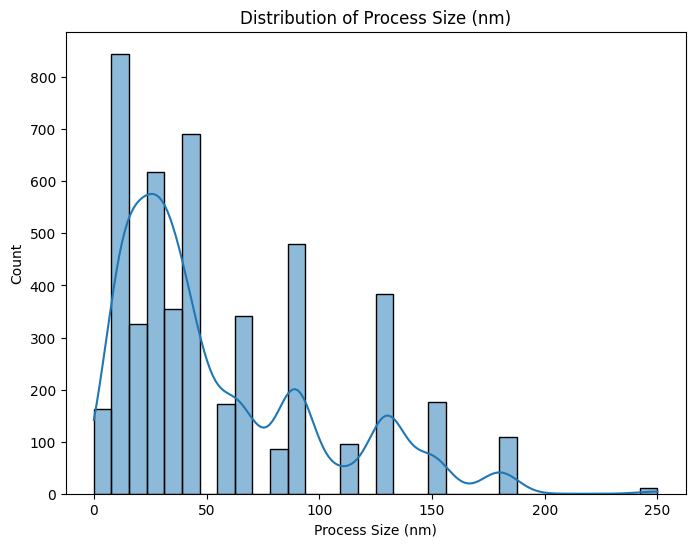

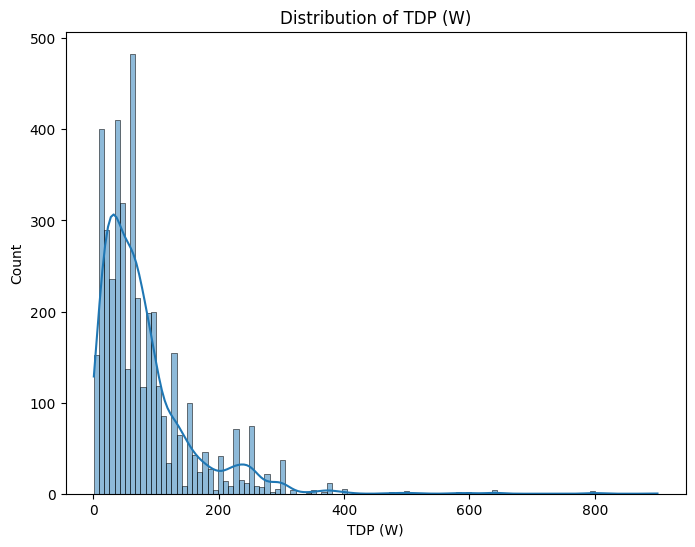

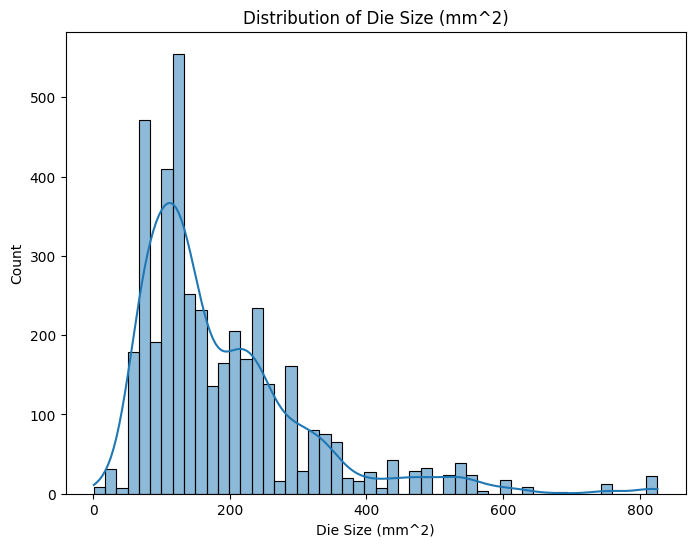

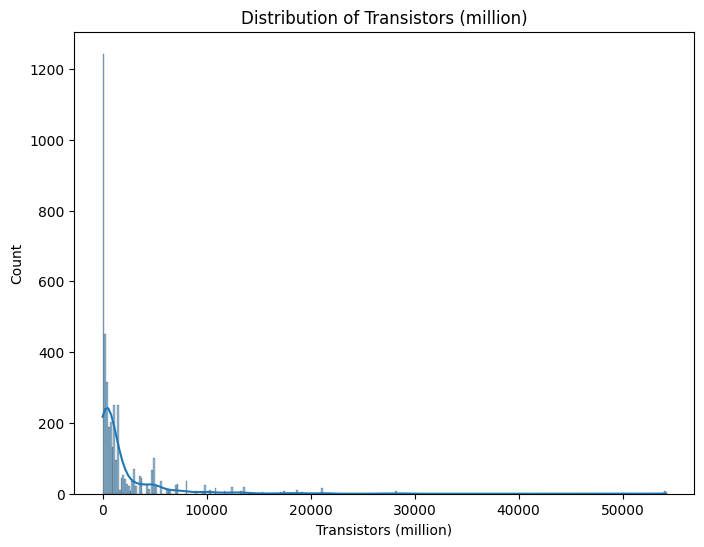

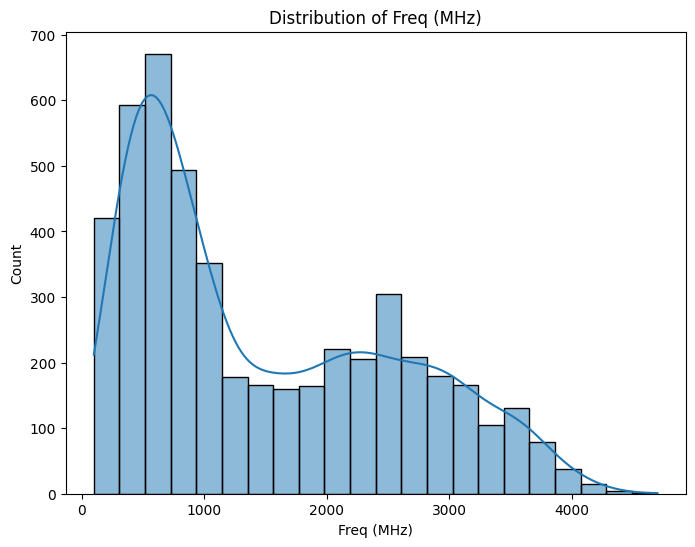

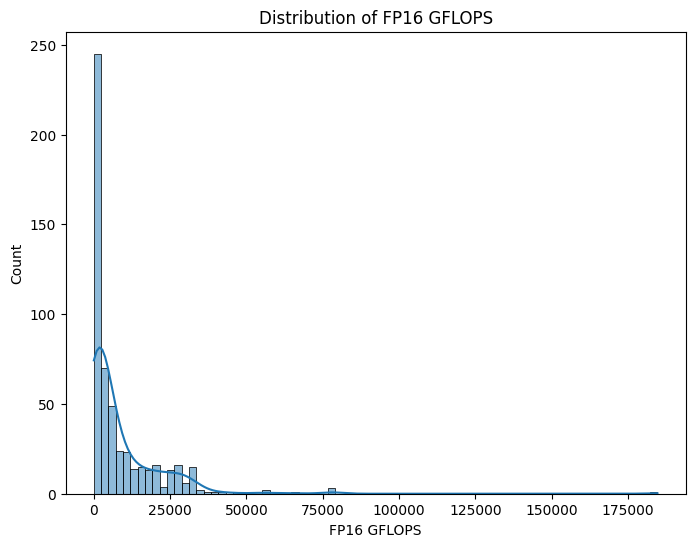

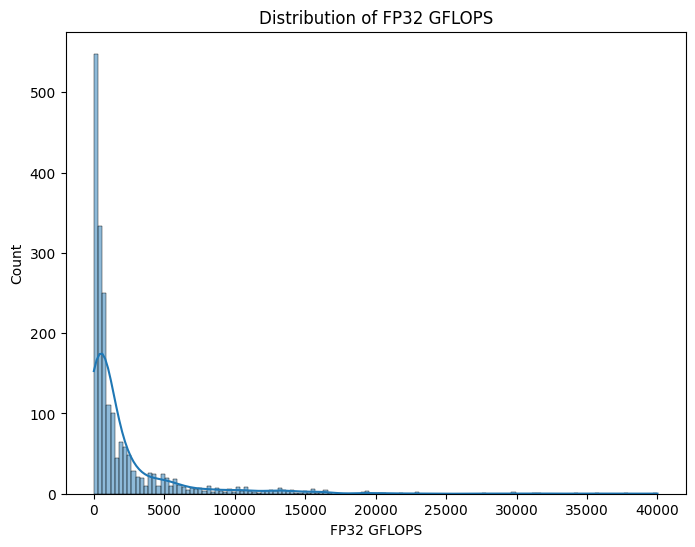

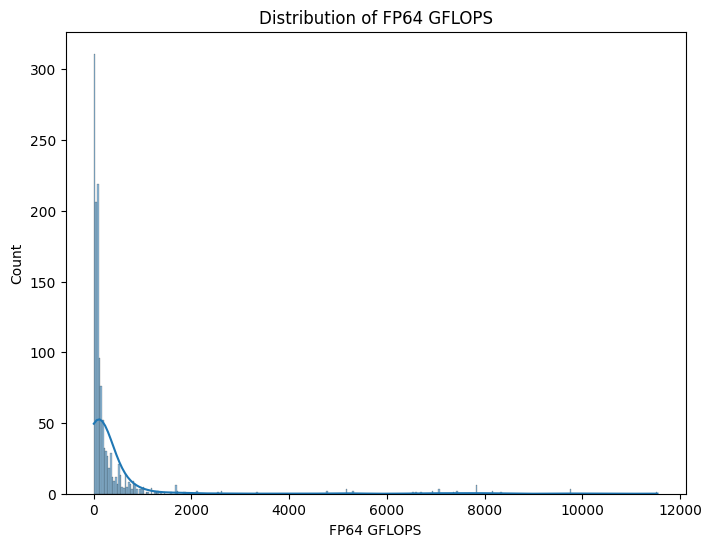

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib as plt
import seaborn as sns # Import the seaborn library and alias it as 'sns'

# Histograms for numerical features
for col in numerical_cols:
    if col in df.columns: # Check if column still exists
      plt.figure(figsize=(8, 6))
      sns.histplot(df[col], kde=True)
      plt.title(f'Distribution of {col}')
      plt.show()

demonstrate the validity of the following assumptions: Moore's Law still holds, especially in GPUs.

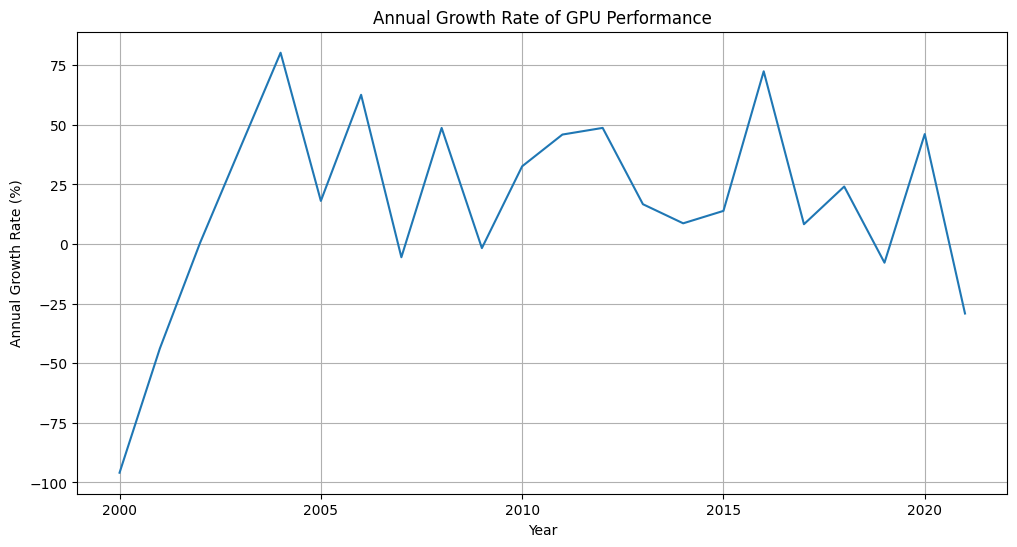

In [58]:
# Convert 'Release Date' to numerical representation for analysis
df['Release Year'] = df['Release Date'].dt.year

# Group data by year and calculate the mean performance
# Replace 'Performance' with the actual column name
performance_by_year = df.groupby('Release Year')['Transistors (million)'].mean()

# Calculate the annual growth rate
annual_growth_rates = performance_by_year.pct_change() * 100

# Plot the annual growth rates
plt.figure(figsize=(12, 6))
plt.plot(annual_growth_rates.index, annual_growth_rates.values)
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.title('Annual Growth Rate of GPU Performance')
plt.grid(True)
plt.show()

# Calculate the average annual growth rate
avg_annual_growth = annual_growth_rates.mean()

Dannard Scaling is still valid in general.

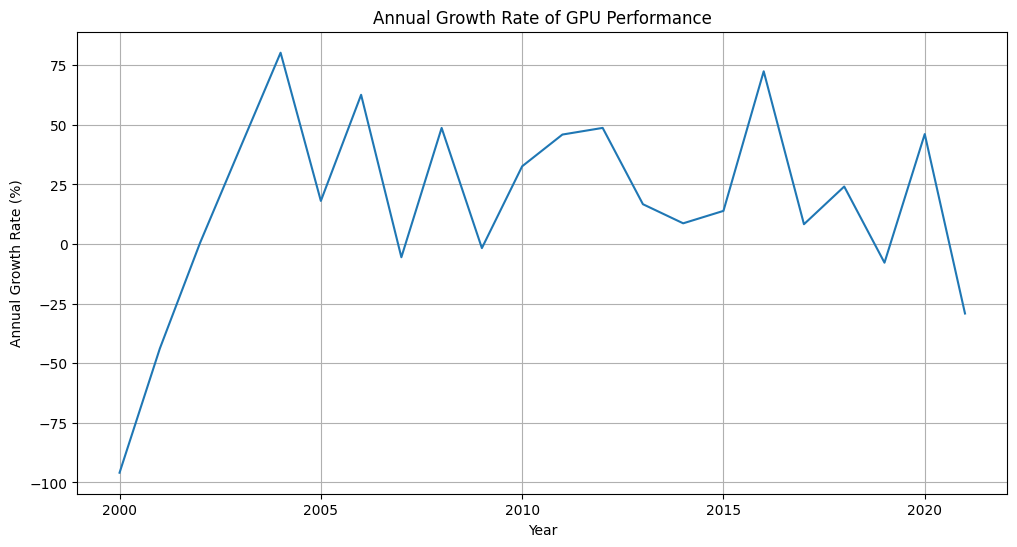

Average Annual Growth Rate: 17.45%


In [59]:
# Convert 'Release Date' to numerical representation for analysis
df['Release Year'] = df['Release Date'].dt.year

# Group data by year and calculate the mean performance
# Replace 'Performance' with the actual column name
performance_by_year = df.groupby('Release Year')['Transistors (million)'].mean()

# Calculate the annual growth rate
annual_growth_rates = performance_by_year.pct_change() * 100

# Plot the annual growth rates
plt.figure(figsize=(12, 6))
plt.plot(annual_growth_rates.index, annual_growth_rates.values)
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.title('Annual Growth Rate of GPU Performance')
plt.grid(True)
plt.show()

# Calculate the average annual growth rate
avg_annual_growth = annual_growth_rates.mean()
print(f"Average Annual Growth Rate: {avg_annual_growth:.2f}%")

CPUs have higher frequencies, but GPUs are catching up.

GPU performance doubles every 1.5 years.

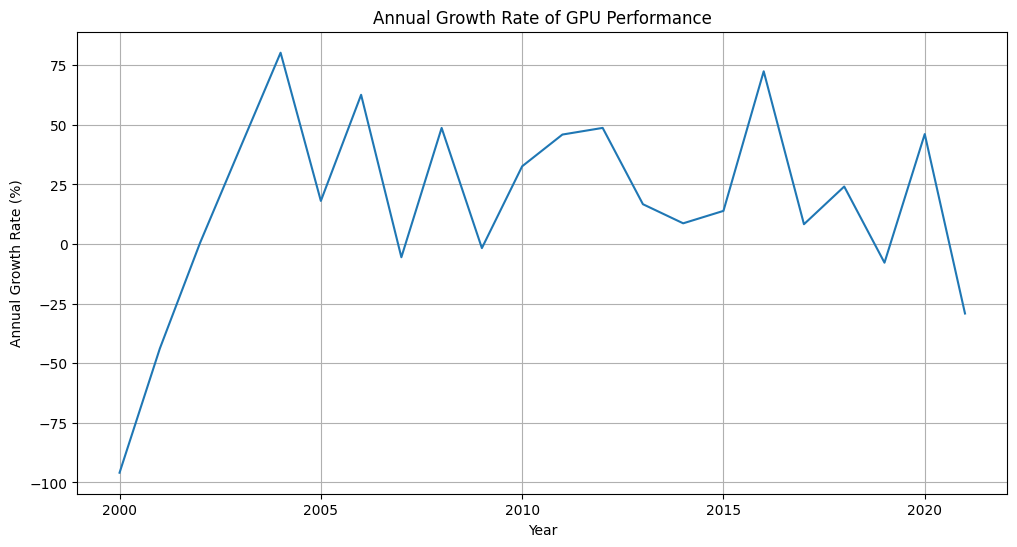

Average Annual Growth Rate: 17.45%


In [60]:
df['Release Year'] = df['Release Date'].dt.year

# Group data by year and calculate the mean performance
# Replace 'Performance' with the actual column name
performance_by_year = df.groupby('Release Year')['Transistors (million)'].mean()

# Calculate the annual growth rate
annual_growth_rates = performance_by_year.pct_change() * 100

# Plot the annual growth rates
plt.figure(figsize=(12, 6))
plt.plot(annual_growth_rates.index, annual_growth_rates.values)
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.title('Annual Growth Rate of GPU Performance')
plt.grid(True)
plt.show()

# Calculate the average annual growth rate
avg_annual_growth = annual_growth_rates.mean()
print(f"Average Annual Growth Rate: {avg_annual_growth:.2f}%")

GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.

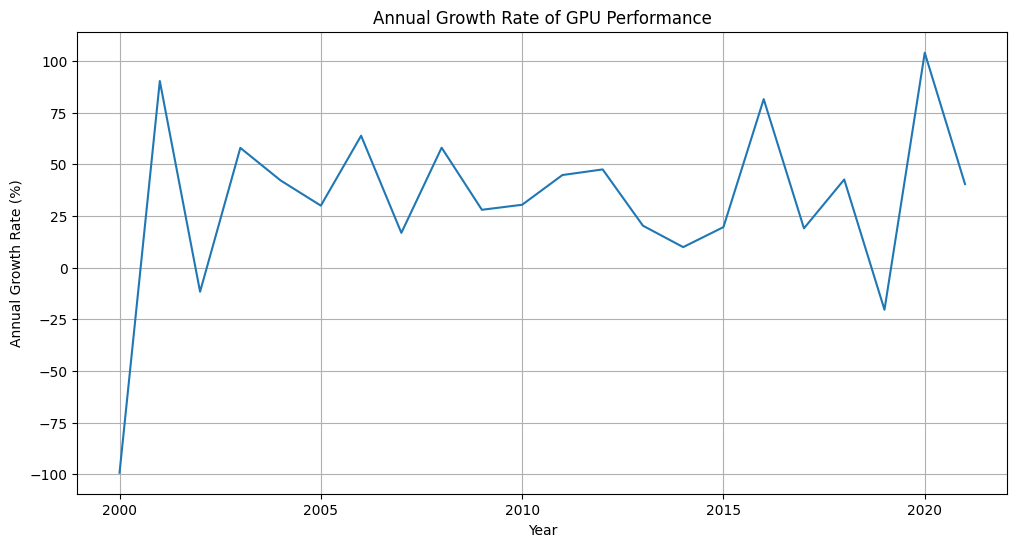

Average Annual Growth Rate: 32.58%


In [ ]:
df['Release Year'] = df['Release Date'].dt.year

# Group data by year and calculate the mean performance
# Replace 'Performance' with the actual column name
performance_by_year = df.groupby('Release Year')['Transistors (million)'].mean()

# Calculate the annual growth rate
annual_growth_rates = performance_by_year.pct_change() * 100

# Plot the annual growth rates
plt.figure(figsize=(12, 6))
plt.plot(annual_growth_rates.index, annual_growth_rates.values)
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.title('Annual Growth Rate of GPU Performance')
plt.grid(True)
plt.show()

# Calculate the average annual growth rate
avg_annual_growth = annual_growth_rates.mean()
print(f"Average Annual Growth Rate: {avg_annual_growth:.2f}%")

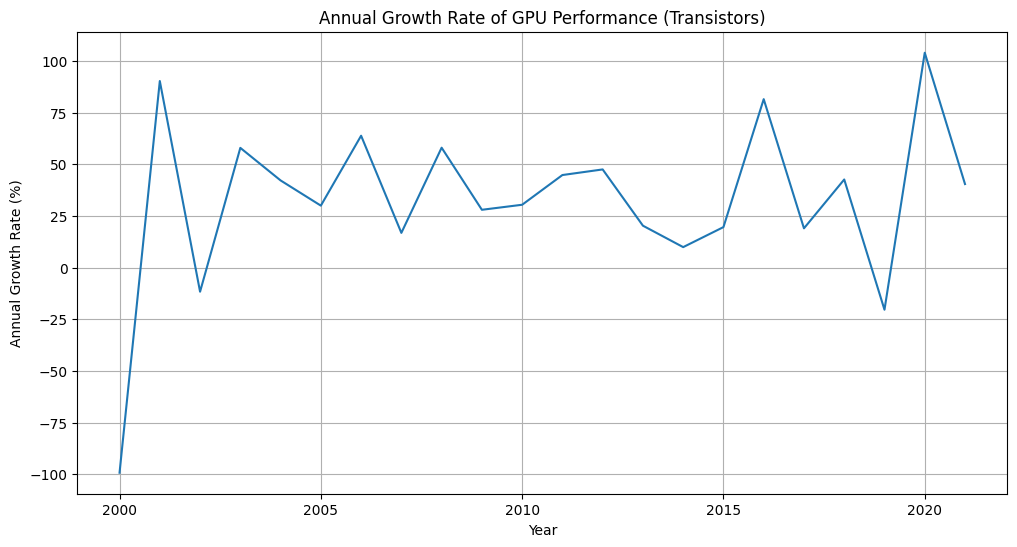

Average Annual Growth Rate: 32.58%


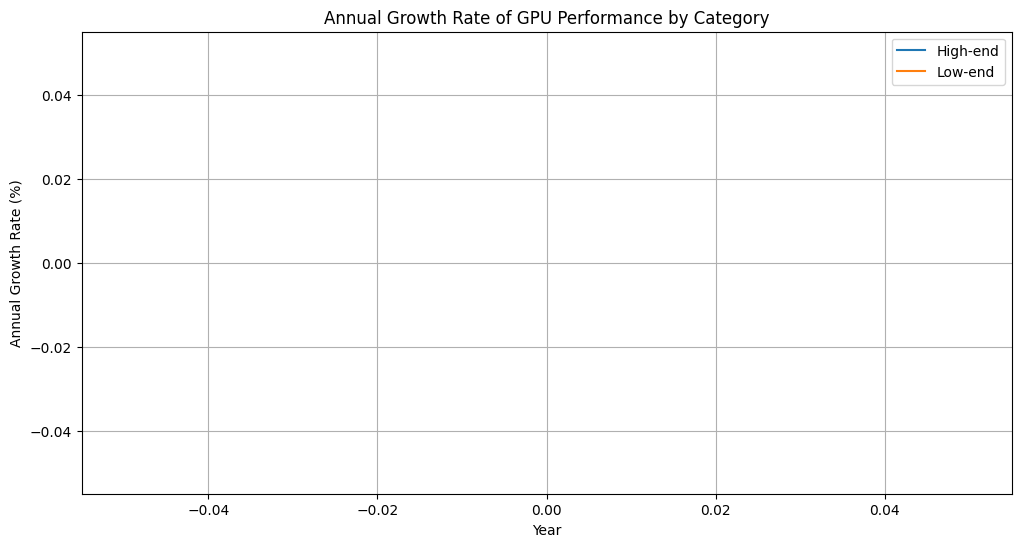

In [ ]:
# prompt: High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.

# Assuming 'df' is your DataFrame and 'Transistors (million)' is the performance indicator.

# Calculate the annual growth rate of GPU performance
df['Release Year'] = df['Release Date'].dt.year
performance_by_year = df.groupby('Release Year')['Transistors (million)'].mean()
annual_growth_rates = performance_by_year.pct_change() * 100

# Plot the annual growth rate
plt.figure(figsize=(12, 6))
plt.plot(annual_growth_rates.index, annual_growth_rates.values)
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.title('Annual Growth Rate of GPU Performance (Transistors)')
plt.grid(True)
plt.show()

# Calculate and print the average annual growth rate
avg_annual_growth = annual_growth_rates.mean()
print(f"Average Annual Growth Rate: {avg_annual_growth:.2f}%")


# Further analysis, you can segment by "Category" (High-end, Low-end) to compare their growth rates
# Check if 'Type' column exists instead of 'Category'
if 'Type' in df.columns:
    high_end_gpus = df[df["Type"]=="Desktop"] # Assuming 'Desktop' represents high-end
    low_end_gpus = df[df["Type"]=="Mobile"]  # Assuming 'Mobile' represents low-end
else:
    print("Column 'Type' not found in the DataFrame. Please check your data.")
    # If you have a different column for category, replace "Type" with that column name

# Continue with the analysis if the column was found
if 'Type' in df.columns:
  high_end_performance = high_end_gpus.groupby('Release Year')['Transistors (million)'].mean()
  low_end_performance = low_end_gpus.groupby('Release Year')['Transistors (million)'].mean()

  high_end_growth = high_end_performance.pct_change() * 100
  low_end_growth = low_end_performance.pct_change() * 100


  plt.figure(figsize=(12, 6))
  plt.plot(high_end_growth.index, high_end_growth.values, label='High-end')
  plt.plot(low_end_growth.index, low_end_growth.values, label='Low-end')
  plt.xlabel('Year')
  plt.ylabel('Annual Growth Rate (%)')
  plt.title('Annual Growth Rate of GPU Performance by Category')
  plt.legend()
  plt.grid(True)
  plt.show()

Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors

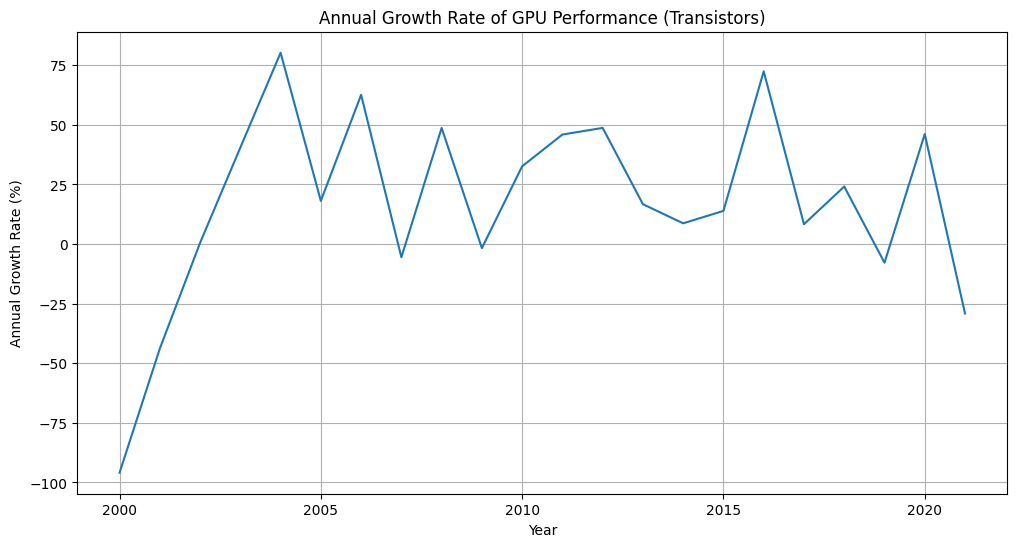

Average Annual Growth Rate: 17.45%


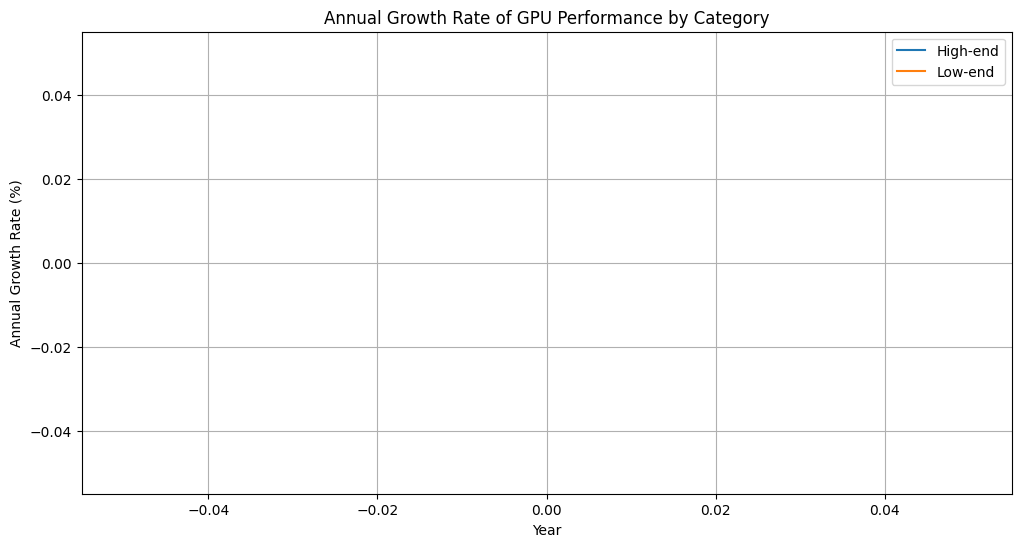

In [61]:
# Calculate the annual growth rate of GPU performance
df['Release Year'] = df['Release Date'].dt.year
performance_by_year = df.groupby('Release Year')['Transistors (million)'].mean()
annual_growth_rates = performance_by_year.pct_change() * 100

# Plot the annual growth rate
plt.figure(figsize=(12, 6))
plt.plot(annual_growth_rates.index, annual_growth_rates.values)
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.title('Annual Growth Rate of GPU Performance (Transistors)')
plt.grid(True)
plt.show()

# Calculate and print the average annual growth rate
avg_annual_growth = annual_growth_rates.mean()
print(f"Average Annual Growth Rate: {avg_annual_growth:.2f}%")


# Further analysis, you can segment by "Type" (Desktop, Mobile) to compare their growth rates
if 'Type' in df.columns:
    high_end_gpus = df[df["Type"]=="Desktop"] # Assuming 'Desktop' represents high-end
    low_end_gpus = df[df["Type"]=="Mobile"]  # Assuming 'Mobile' represents low-end
else:
    print("Column 'Type' not found in the DataFrame. Please check your data.")
    # If you have a different column for category, replace "Type" with that column name

# Continue with the analysis if the column was found
if 'Type' in df.columns:
  high_end_performance = high_end_gpus.groupby('Release Year')['Transistors (million)'].mean()
  low_end_performance = low_end_gpus.groupby('Release Year')['Transistors (million)'].mean()

  high_end_growth = high_end_performance.pct_change() * 100
  low_end_growth = low_end_performance.pct_change() * 100


  plt.figure(figsize=(12, 6))
  plt.plot(high_end_growth.index, high_end_growth.values, label='High-end')
  plt.plot(low_end_growth.index, low_end_growth.values, label='Low-end')
  plt.xlabel('Year')
  plt.ylabel('Annual Growth Rate (%)')
  plt.title('Annual Growth Rate of GPU Performance by Category')
  plt.legend()
  plt.grid(True)
  plt.show()

The manufacturer with the highest number of chips is: TSMC (2178 chips)


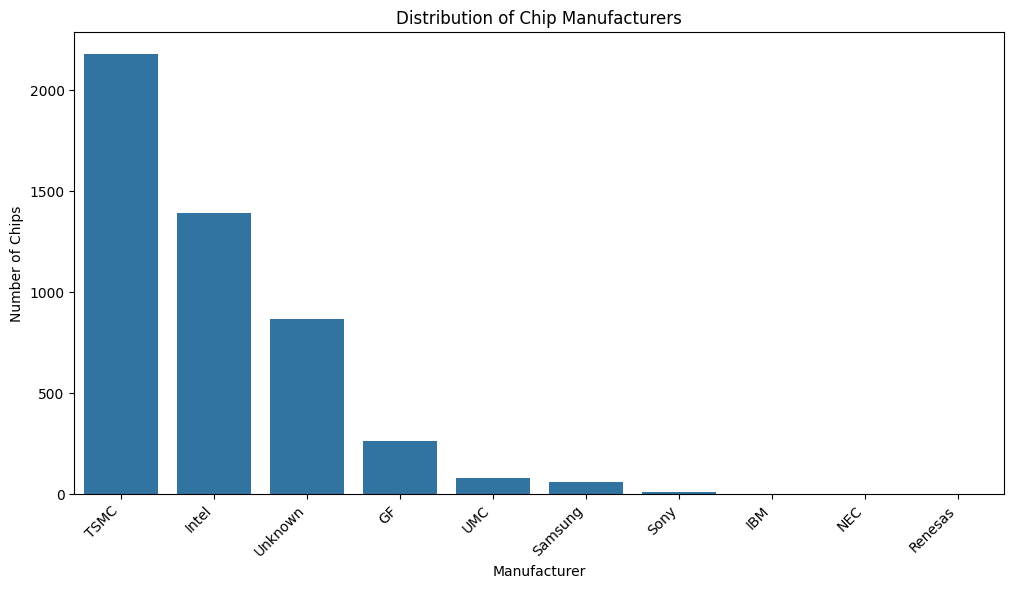

In [ ]:
# Replace 'Foundry' with the actual column name if it's different
manufacturer_counts = df['Foundry'].value_counts()

# Find the manufacturer with the highest count
top_manufacturer = manufacturer_counts.index[0]
top_manufacturer_count = manufacturer_counts.iloc[0]

print(f"The manufacturer with the highest number of chips is: {top_manufacturer} ({top_manufacturer_count} chips)")


# Create a bar plot to visualize the distribution of chip manufacturers
plt.figure(figsize=(12, 6))
sns.countplot(x='Foundry', data=df, order=df['Foundry'].value_counts().index) # Replace 'Foundry' here as well
plt.title('Distribution of Chip Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Chips')
plt.xticks(rotation=45, ha='right')
plt.show()